# Figure 1 - Study overview and genome-wide allele frequency changes

In [5]:
# load external dependencies
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline

import glob, os, re
import numpy as np
import pandas as pd # (*) Pandas for data manipulation
import math

import json, matplotlib
s = json.load( open("matplotlibrc.json") )
matplotlib.rcParams.update(s)

# load internal dependencies
import colors,plot,utils
from utils import sgd_length
# from config import *
from paths import *

## Data import

### Entropy

In [6]:
# files = glob.glob(dir_data+"seq/entropy/*.entropy.txt")

# entropy_df = pd.DataFrame()
# for pp in files:
#     # read into pandas dataframe
#     frame = pd.read_csv(pp, sep="\t", names=['time','entropy'])

#     f = re.split(r'[.-]+', os.path.basename(pp))

#     frame['sample'] = f[0]
#     frame['background'] = f[0].split('_')[0]
#     frame['cross'] = f[0].split('_')[1]
#     frame['cross_rep'] = f[0].split('_')[2]
#     frame['selection'] = f[0].split('_')[3]
#     frame['selection_rep'] = f[0].split('_')[4]
    
#     entropy_df = entropy_df.append(frame, ignore_index=True)

# entropy_df['entropy'] /= 52466
# # entropy_df['entropy'] = 1+entropy_df['entropy']

# entropy_df = pd.pivot_table(entropy_df, 
#                             values='entropy', 
#                             index=['time'], 
#                             columns=['selection','sample'])

# entropy_df.head()

In [9]:
# files = glob.glob(dir_data+"seq/filterHD-v1.0/SNVs.seg.*.filtered.jumps.txt")

# jumps_df = pd.DataFrame()
# for jj in files:
#     # read into pandas dataframe
#     frame = pd.read_csv(jj, sep=' ', index_col=None)
#     frame.rename(columns={'#sample': 'chr'}, inplace=True)
#     #
#     f = re.split(r'[.-]+', os.path.basename(jj))
#     frame['sample'] = f[2]
#     frame['time'] = f[5]
#     #
#     jumps_df = jumps_df.append(frame, ignore_index=True)

files = glob.glob(dir_data+"seq/background/filterHD-v1.0/SNVs.seg.*.filtered.posterior-*.txt")

freq_df = pd.DataFrame()
for pp in files:
    # read into pandas dataframe
    df = pd.read_csv(pp, sep=r"\s+", index_col=None)
    df.rename(columns={'#sample': 'chr_arabic'}, inplace=True)
    
    f = re.split(r'[.-]+', os.path.basename(pp))

    df['sample'] = f[2]
    df['background'] = f[2].split('_')[0]
    df['cross'] = f[2].split('_')[1]
    df['cross_rep'] = f[2].split('_')[2]
    df['selection'] = f[2].split('_')[3]
    df['selection_rep'] = f[2].split('_')[4]
    df['time'] = int(f[5])
    
    freq_df = freq_df.append(df, ignore_index=True)

freq_df = utils.chr_to_gw(freq_df)
freq_df['chr_roman'] = freq_df['chr_arabic'].apply(utils.int_to_roman)

freq_df = freq_df[~freq_df['selection'].isin(['PM-HU','PM-RM','PM'])]

freq_df = pd.pivot_table(freq_df, 
                         index=['selection','sample','time'], 
                         columns=['chr_arabic','chr_roman','site','pos'], 
                         values='mean')

freq_df.head()

chr_arabic                                   1                              \
chr_roman                                     I                              
site                                     2718     2731     2734     4532     
pos                                    2718     2731     2734     4532       
selection sample                  time                                       
HU        WAxNA_F12_1_HU_1_T0     1       0.926    0.926    0.926    0.948   
          WAxNA_F12_1_HU_1_T16    1       0.956    0.957    0.957    0.969   
          WAxNA_F12_1_HU_1_T2     1       0.920    0.920    0.920    0.932   
          WAxNA_F12_1_HU_1_T32    1       0.978    0.979    0.979    0.985   
          WAxNA_F12_1_HU_1_T32_C1 1       0.989    0.989    0.989    0.990   

chr_arabic                                                                  \
chr_roman                                                                    
site                                     5035     5218     5237     6556     
pos                                    5035     5218     5237     6556       
selection sample                  time                                       
HU        WAxNA_F12_1_HU_1_T0     1       0.944    0.942    0.942    0.921   
          WAxNA_F12_1_HU_1_T16    1       0.960    0.956    0.956    0.965   
          WAxNA_F12_1_HU_1_T2     1       0.924    0.922    0.922    0.957   
          WAxNA_F12_1_HU_1_T32    1       0.986    0.988    0.988    0.989   
          WAxNA_F12_1_HU_1_T32_C1 1       0.990    0.990    0.990    0.991   

chr_arabic                                                 ...          16  \
chr_roman                                                  ...         XVI   
site                                     6652     6673     ...      924009   
pos                                    6652     6673       ...    12047269   
selection sample                  time                     ...               
HU        WAxNA_F12_1_HU_1_T0     1       0.921    0.921   ...       0.393   
          WAxNA_F12_1_HU_1_T16    1       0.967    0.968   ...       0.358   
          WAxNA_F12_1_HU_1_T2     1       0.960    0.960   ...       0.432   
          WAxNA_F12_1_HU_1_T32    1       0.990    0.990   ...       0.727   
          WAxNA_F12_1_HU_1_T32_C1 1       0.991    0.991   ...       0.997   

chr_arabic                                                                  \
chr_roman                                                                    
site                                     924127   924130   924152   924943   
pos                                    12047387 12047390 12047412 12048203   
selection sample                  time                                       
HU        WAxNA_F12_1_HU_1_T0     1       0.394    0.394    0.394    0.412   
          WAxNA_F12_1_HU_1_T16    1       0.355    0.355    0.355    0.360   
          WAxNA_F12_1_HU_1_T2     1       0.430    0.430    0.430    0.440   
          WAxNA_F12_1_HU_1_T32    1       0.727    0.727    0.727    0.722   
          WAxNA_F12_1_HU_1_T32_C1 1       0.997    0.997    0.997    0.996   

chr_arabic                                                                  \
chr_roman                                                                    
site                                     925012   925027   925033   926851   
pos                                    12048272 12048287 12048293 12050111   
selection sample                  time                                       
HU        WAxNA_F12_1_HU_1_T0     1       0.414    0.415    0.415    0.428   
          WAxNA_F12_1_HU_1_T16    1       0.361    0.361    0.361    0.376   
          WAxNA_F12_1_HU_1_T2     1       0.440    0.441    0.441    0.437   
          WAxNA_F12_1_HU_1_T32    1       0.722    0.722    0.722    0.717   
          WAxNA_F12_1_HU_1_T32_C1 1       0.996    0.996    0.996    0.995   

chr_arabic                                       
chr_roman                                    

In [10]:
# load data
seq_mut_df = utils.load_data(dir_data+'seq/de-novo/seq_dn_df_consensus.pickle')

seq_mut_df = seq_mut_df.rename(columns={'chrom':'chr_arabic', 'pos':'site'})
seq_mut_df['chr_roman'] = seq_mut_df['chr_arabic'].apply(utils.int_to_roman)
seq_mut_df = utils.chr_to_gw(seq_mut_df)

seq_mut_df = seq_mut_df[seq_mut_df.mutation_type=='driver']
# seq_mut_df = seq_mut_df[(seq_mut_df.time=='32')&\
#                         (seq_mut_df.clone!='')].reset_index(drop=True)

# Annotate zygosity
seq_mut_df['genotype'] = seq_mut_df['genotype'].map({'0/0': 0, '0/1': 1, '1/0': 1, '1/1': 2})

seq_mut_df['type'] = 'de novo'

seq_mut_df = pd.pivot_table(seq_mut_df, 
                           index=['selection','population','time'], 
                           columns=['chr_arabic','chr_roman','pos','gene'])['frequency']

seq_mut_df.head()

chr_arabic                       7                         10                  \
chr_roman                       VII                         X                   
pos                         4594951   4595191 4595192 6225315 6225325 6225369   
gene                           RNR4      RNR4    RNR4    RNR2    RNR2    RNR2   
selection population time                                                       
HU        NA_HU_1    16    0.000000  0.020000     NaN     NaN     NaN     NaN   
                     2     0.000000  0.000000     NaN     NaN     NaN     NaN   
                     32    0.390476  0.150538     NaN     NaN     NaN     NaN   
                     4     0.000000  0.000000     NaN     NaN     NaN     NaN   
                     8     0.000000  0.000000     NaN     NaN     NaN     NaN   

chr_arabic                                                                 \
chr_roman                                                                   
pos                       6225481 6397218 6397791 6397792 6397989 6397990   
gene                         RNR2    TOR1    TOR1    TOR1    TOR1    TOR1   
selection population time                                                   
HU        NA_HU_1    16       NaN     NaN     NaN     NaN     NaN     NaN   
                     2        NaN     NaN     NaN     NaN     NaN     NaN   
                     32       NaN     NaN     NaN     NaN     NaN     NaN   
                     4        NaN     NaN     NaN     NaN     NaN     NaN   
                     8        NaN     NaN     NaN     NaN     NaN     NaN   

chr_arabic                             14                                  \
chr_roman                             XIV                                   
pos                       6398011 9619556 9619557 9619666 9619831 9619834   
gene                         TOR1    FPR1    FPR1    FPR1    FPR1    FPR1   
selection population time                                                   
HU        NA_HU_1    16       NaN     NaN     NaN     NaN     NaN     NaN   
                     2        NaN     NaN     NaN     NaN     NaN     NaN   
                     32       NaN     NaN     NaN     NaN     NaN     NaN   
                     4        NaN     NaN     NaN     NaN     NaN     NaN   
                     8        NaN     NaN     NaN     NaN     NaN     NaN   

chr_arabic                         
chr_roman                          
pos                       9619860  
gene                         FPR1  
selection population time          
HU        NA_HU_1    16       NaN  
                     2        NaN  
                     32       NaN  
                     4        NaN  
                     8        NaN

In [12]:
# load data
files = glob.glob(dir_data+'seq/background/QTL-figure-1.0-data/WAxNA*kb*.txt')

seq_qtl_df = pd.DataFrame()

for fn in files:
    # read into pandas dataframe
    df = pd.read_csv(fn, sep=r"\s+", names=['site','score'], index_col=None)

    #
    f = re.split(r'[.-]+', os.path.basename(fn))
    df['chr_arabic'] = int(f[2].replace('chr',''))
    df['selection'] = f[0].split('_')[3]
    df['sample'] = f[0]
    df['resolution'] = float(f[3].replace('kb',''))
    #
    seq_qtl_df = seq_qtl_df.append(df, ignore_index=True)

# 
seq_qtl_df = utils.chr_to_gw(seq_qtl_df)
seq_qtl_df['chr_roman'] = seq_qtl_df['chr_arabic'].apply(utils.int_to_roman)

# 
seq_qtl_df = pd.pivot_table(seq_qtl_df, 
                            index=['chr_arabic','chr_roman','site','pos'], 
                            columns=['resolution','selection','sample'], 
                            values='score')

# reorder columns
seq_qtl_df = seq_qtl_df.reindex(columns=['HU','RM','YPD'], level='selection')

seq_qtl_df.head()

resolution                                       2                    \
selection                                        RM                    
sample                             WAxNA_F12_1_RM_1 WAxNA_F12_1_RM_2   
chr_arabic chr_roman site  pos                                         
8          VIII      12938 4842868          4.30642         0.056064   
                     12985 4842915          4.30641         0.056064   
                     12997 4842927          4.30640         0.056066   
                     13185 4843115          4.70861         0.156615   
                     13408 4843338          4.63759         0.163066   

resolution                                                            \
selection                                                              
sample                             WAxNA_F12_1_RM_3 WAxNA_F12_1_RM_4   
chr_arabic chr_roman site  pos                                         
8          VIII      12938 4842868          1.77355          4.19237   
                     12985 4842915          1.78612          4.21120   
                     12997 4842927          1.78612          4.21120   
                     13185 4843115          1.63451          4.58713   
                     13408 4843338          1.72722          4.70246   

resolution                                                            \
selection                                                              
sample                             WAxNA_F12_2_RM_1 WAxNA_F12_2_RM_2   
chr_arabic chr_roman site  pos                                         
8          VIII      12938 4842868         0.001441          1.15575   
                     12985 4842915         0.001439          1.15575   
                     12997 4842927         0.001440          1.15575   
                     13185 4843115         0.083320          1.06349   
                     13408 4843338         0.083247          1.05991   

resolution                                                            \
selection                                                              
sample                             WAxNA_F12_2_RM_3 WAxNA_F12_2_RM_4   
chr_arabic chr_roman site  pos                                         
8          VIII      12938 4842868          7.31483         0.130824   
                     12985 4842915          7.31481         0.130825   
                     12997 4842927          7.31479         0.130828   
                     13185 4843115          5.58349         0.362793   
                     13408 4843338          5.48266         0.383678   

resolution                                                          \
selection                                                            
sample                             WAxNA_F2_1_RM_1 WAxNA_F2_2_RM_1   
chr_arabic chr_roman site  pos                                       
8          VIII      12938 4842868         1.58797         3.50553   
                     12985 4842915         1.58798         3.50554   
                     12997 4842927         1.58797         3.50553   
                     13185 4843115         1.99148         5.87267   
                     13408 4843338         1.99206         5.87306   

resolution                               ...                      50  \
selection                                ...                      RM   
sample                                   ...        WAxNA_F12_2_RM_2   
chr_arabic chr_roman site  pos           ...                           
8          VIII      12938 4842868       ...                 1.33375   
                     12985 4842915       ...                 1.28009   
                     12997 4842927       ...                 1.28011   
                     13185 4843115       ...                 1.37917   
                     13408 4843338       ...                 1.30517   

resolution                                                            \
selection                                           

In [13]:
# load data
files = glob.glob(dir_data+'seq/background/QTL-figure-1.0-data/bestScores.*')

seq_scores_df = pd.DataFrame()

for fn in files:
    # read into pandas dataframe
    df = pd.read_csv(fn, sep=r"\s+", names=['site','score'], index_col=None)
    df['chr_arabic'] = int(f[2].replace('chr',''))
    
    #
    f = re.split(r'[.-]+', os.path.basename(fn))
    df['selection'] = f[1]
    df['resolution'] = float(f[3].replace('kb',''))
    #
    seq_scores_df = seq_scores_df.append(df, ignore_index=True)
    
# 
seq_scores_df = utils.chr_to_gw(seq_scores_df)
seq_scores_df['chr_roman'] = seq_scores_df['chr_arabic'].apply(utils.int_to_roman)

seq_scores_df.head()

,site,score,chr_arabic,selection,resolution,pos,chr_roman
0,473628,569.109,8,RM,10,5303558,VIII
1,473685,142.924,8,RM,10,5303615,VIII
2,473685,529.576,8,RM,10,5303615,VIII
3,479001,169.253,8,RM,10,5308931,VIII
4,457091,246.485,8,RM,10,5287021,VIII


KeyError: 'WAxNA_F12_2_HU_1'

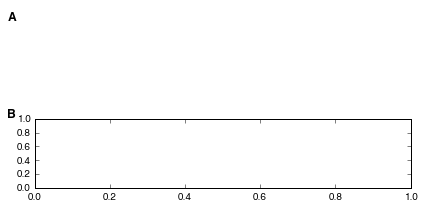

In [14]:
fig = plt.figure(figsize=(6, 6), dpi=300)

grid = gridspec.GridSpec(4, 1, height_ratios=[1.25,1,1,1], hspace=0.3)

gs = {}
gs['schematic'] = gridspec.GridSpecFromSubplotSpec(1, 3, width_ratios=[1,1,2], subplot_spec=grid[0])
gs['HU'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1])
gs['RM'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[2])
gs['RM_zoom'] = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=grid[3], wspace=0.25)

### top panel ###
ax0 = plt.subplot(gs['schematic'][0])

ax0.text(-0.22, 1.0,  chr(ord('A')), transform=ax0.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

ax0.axis('off')
ax0.patch.set_visible(False)

### ###
for ii, (env, sample) in enumerate(zip(['HU','RM'],['WAxNA_F12_2_HU_1','WAxNA_F12_1_RM_1'])):
    ax1 = plt.subplot(gs[env][0])
    ax1.text(-0.05, 1.15,  chr(ii+ord('B')), transform=ax1.transAxes,
             fontsize=12, fontweight='bold', va='top', ha='right')


    pdf = freq_df.ix[(env,sample)].T

    colors = [dict_time['color'][k] for k in pdf.columns.get_level_values('time')]
    colors = [plt.cm.viridis(x) for x in np.arange(0.8,0,-0.15)]
    pdf.reset_index().plot(ax=ax1, kind='line',
                           x='pos', y=[2,4,8,16,32],
                           color=colors, alpha=0.75, lw=0.5, 
                           legend=False, zorder=3)
    
    ax1.set_xlabel('')
    ax1.set_ylabel('Allele frequency')

    ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax1.yaxis.set_minor_locator(MaxNLocator(nbins=20))
    ax1.yaxis.set_ticks_position('left')
    
    # grid
    xlabels = sgd_length.chr_start + (sgd_length.chr_end - sgd_length.chr_start)/2.
    xstart = sgd_length.chr_start
    ax1.set_xticks(xlabels)
    ax1.set_xticklabels(sgd_length.chr_arabic.apply(utils.int_to_roman))
    xgrid=[xst+1. for xst in list(set(xstart))]
    [ax1.axvline(g, lw=0.75, ls="-", color="0.9") for g in xgrid] # vertical lines
    ax1.yaxis.grid(lw=0.5, ls="-", color="0.9") # horizontal lines
    
    ax1.annotate(sample.replace('_',' '),
                 xy=(0.025, 0.9), xycoords=ax1.transAxes, fontsize=6,
                 color='k', ha='left', va='center',
                 xytext=(-5,0), textcoords='offset points', 
                 bbox=(dict(facecolor='white', edgecolor='none', 
                            alpha=0.75, boxstyle='round,pad=.2')))
    
    ax1.tick_params(axis='x', which='major', size=0, labelsize=6)
    ax1.tick_params(axis='y', which='major', size=2, labelsize=6)
    ax1.tick_params(axis='both', which='minor', size=1, labelsize=4)
    
    # show de novo mutations
    sdn = seq_mut_df.ix[env,sample].dropna(axis=1, how='all')
    
    labels = sdn.columns.get_level_values('gene')
    loc = zip(sdn.columns.get_level_values('pos'), [1.025]*sdn.shape[1])
    
    for gene, xy in zip(labels, loc):
        ann = ax1.annotate(gene, xy=xy, xycoords=('data', 'axes fraction'), 
                           xytext=(0, 2), textcoords='offset points',
                           arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                           fontsize=4, style='italic', 
                           annotation_clip=False, va='bottom', ha='center', 
                           bbox=dict(facecolor='none', edgecolor='gray', boxstyle='round,pad=.2'))

    if env=='HU':
        leg1 = ax1.legend(bbox_to_anchor=(1.05, 0.2), ncol=1, 
                          frameon=False, loc='upper center',
                          borderaxespad=0, handlelength=1, 
                          title='Time \n(days)', prop={'size':5})
        # set the linewidth of each legend object
        for line in leg1.legendHandles:
            line.set_linewidth(.75)
        plt.setp(leg1.get_title(),fontsize=6)
        
### top panel ###
ax2 = plt.subplot(gs['RM_zoom'][0])
ax2_zoom = ax2.twiny()

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
xmin = sgd_length[sgd_length.chr_arabic==8].chr_start.squeeze()##freq.index.get_level_values('pos').min()
xmax = sgd_length[sgd_length.chr_arabic==8].chr_end.squeeze()#freq.index.get_level_values('pos').max()

ax2_zoom.set_xlim(xmin, xmax)
ax2_zoom.set_xticks([])
ax2_zoom.set_xticklabels([])

plot.zoom_effect(ax1, ax2_zoom, xmin, xmax, edgecolor='none', facecolor='gray')#, edgewidth=5)

freq = freq_df.loc[('RM','WAxNA_F12_1_RM_1'),8].T

colors = [dict_time['color'][k] for k in freq.columns.get_level_values('time')]
colors = [plt.cm.viridis(x) for x in np.arange(0.8,0,-0.15)]
freq.reset_index().plot(ax=ax2, kind='line',
                        x='site', y=[2,4,8,16,32],
                        color=colors, alpha=0.75, lw=1,
                        legend=False)

ax2.set_xlabel('Coordinate (kb)')
ax2.set_ylabel('Allele frequency')

ax2.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax2.xaxis.set_minor_locator(MaxNLocator(nbins=12))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax2.yaxis.set_minor_locator(MaxNLocator(nbins=20))
ax2.yaxis.set_ticks_position('left')

# ax2.xaxis.grid(lw=0.5, ls="-", color="0.9") # vertical lines
ax2.yaxis.grid(lw=0.5, ls="-", color="0.9") # horizontal lines

xticks = map(lambda x: int(x/1E3), ax2.get_xticks())
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)

ax2.annotate('Chr. VIII',
             xy=(0.5, 0.9), xycoords=ax2.transAxes, fontsize=6,
             color='k', ha='center', va='center')

### bottom panel ###
ax3 = plt.subplot(gs['RM_zoom'][1], sharex=ax2)

# slice chr. VII at 30 kb resolution
llh = seq_qtl_df.loc[8,30]
colors=[dict_environment['color'][e] for e in llh.columns.get_level_values('selection')]
llh.reset_index().plot(ax=ax3, kind='line',
                       x='site', y=['RM','YPD'],
                       color=colors, alpha=0.75, lw=1,
                       legend=False, zorder=0)

for environment, score in seq_scores_df[(seq_scores_df.resolution==30)].groupby('selection'):
    markerline, stemlines, baseline = ax3.stem(score.site, score.score)
    
    plt.setp(markerline, 'color', dict_environment['color'][environment], 
             markersize = 2.75, markeredgewidth=.75, markeredgecolor='k', zorder=3)
    plt.setp(stemlines, linewidth=.75, color=dict_environment['color'][environment],
             path_effects=[PathEffects.withStroke(linewidth=1.25, foreground="k")], zorder=2)  
    plt.setp(baseline, 'color', 'none', zorder=1)

ax3.set_xlabel('Coordinate (kb)')
ax3.set_ylabel('Log-likelihood score')

# axes limits
ax3.set_ylim(0, 1.1E3)
ax3.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax3.xaxis.set_minor_locator(MaxNLocator(nbins=12))
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax3.yaxis.set_ticks_position('left')

# annotation in chromosome coordinates
dict_annotation = {
    'CTF8': {
        'chr': 8,
        'start': 486230,
        'end': 486631
    },
    'KOG1': {
        'chr': 8,
        'start': 475999,
        'end': 480672       
    }
}

RM_artist = lines.Line2D((0,1),(0,0), color=dict_environment['color']['RM'], linewidth=.75)
YPD_artist = lines.Line2D((0,1),(0,0), color=dict_environment['color']['YPD'], linewidth=.75)

leg3 = ax3.legend([RM_artist,YPD_artist],
                  ['Rapamycin','Control'], ncol=1,
                  frameon=False, loc='lower left',
                  borderaxespad=0.5, handlelength=1, 
                  prop={'size':5})
plt.setp(leg3.get_title(),fontsize=6)

ax3.annotate('Chr. VIII',
             xy=(0.5, 0.9), xycoords=ax3.transAxes, fontsize=6,
             color='k', ha='center', va='center')

for ax in [ax2,ax3]:
    
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)
    
    for gene in dict_annotation:
        x = dict_annotation[gene]['start'] + (dict_annotation[gene]['end'] - dict_annotation[gene]['start'])/2
        y = 1.025
        ann = ax.annotate(gene, xy=(x, y), xycoords=('data', 'axes fraction'), 
                          xytext=(0, 2), textcoords='offset points',
                          arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                          fontsize=4, style='italic', 
                          annotation_clip=False, va='bottom', ha='center', 
                          bbox=(dict(facecolor='none', edgecolor='gray', boxstyle='round,pad=.2')\
                                if gene == 'CTF8' else \
                                dict(facecolor='none', edgecolor='none', boxstyle='round,pad=.2')))

# axes limits
for ax in fig.get_axes():
#     ax.get_yaxis().set_label_coords(-0.05,0.5)
#     ax.xaxis.label.set_size(6)
#     ax.yaxis.label.set_size(6)
    for sp in ax.spines.values():
        sp.set(color='k', linewidth=0.75, linestyle='-')

    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    
fig.savefig(dir_paper+'figures/figure1/figure1.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_paper+'figures/figure1/figure1.svg', dpi=300, bbox_inches='tight')
plt.show()

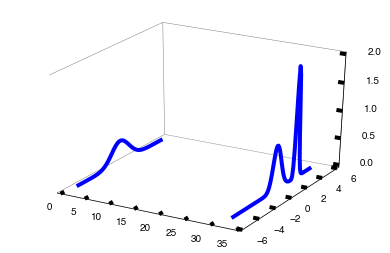

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator

y   = np.linspace(-5,5,100)
x1  = np.ones(y.size)
x2  = np.ones(y.size)*32
# y3  = np.ones(x.size)*3
mean = 0
variance = 1
sigma = math.sqrt(variance)
z1  = mlab.normpdf(y,0,1)
z2  = mlab.normpdf(y,0.5,0.5) + mlab.normpdf(y,3,0.2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# X, Y, Z = [1,2,3,4,5,6,7,8,9,10],[5,6,2,3,13,4,1,2,4,8],[2,3,3,3,5,7,9,11,9,10]
ax.plot_wireframe(x1, y, z1)
ax.plot_wireframe(x2, y, z2)

#
[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('left') for t in ax.get_yticklabels()]
[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('right') for t in ax.get_xticklabels()]
[t.set_va('center') for t in ax.get_zticklabels()]
[t.set_ha('left') for t in ax.get_zticklabels()]

# To clear out the grid, remove the gray fill and outline the panes (i.e. create an empty cubic wireframe around the plot) I use the following:
ax.grid(False)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Tick placement
ax.xaxis._axinfo['tick']['inward_factor'] = 0
ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax.yaxis._axinfo['tick']['inward_factor'] = 0
ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
ax.zaxis._axinfo['tick']['inward_factor'] = 0
ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0.4

# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_major_locator(MultipleLocator(5))
# ax.zaxis.set_major_locator(MultipleLocator(0.01))

plt.show() 

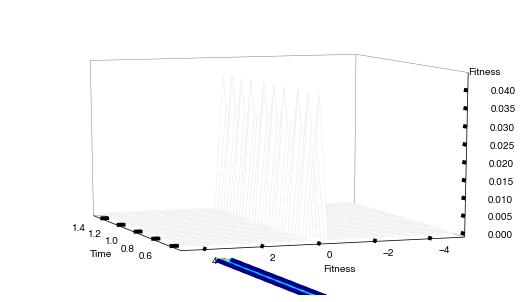

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib import rc
import numpy as np
import sys

# rc('font',size=28)
# rc('font',family='serif')
# rc('axes',labelsize=32)

# filename = sys.argv[1]
# data = np.load(filename)
# output = data[171,:,:].flatten()*np.sqrt(2.0)/13074
# x = np.real(output)
# y = np.imag(output)

y   = np.linspace(-5,5,100)
x  = np.ones(y.size)
# y3  = np.ones(x.size)*3
mean = 0
variance = 1
sigma = math.sqrt(variance)
z  = mlab.normpdf(y,0,1)

bins=30
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0, right=0.90, top=1, bottom=0, wspace=0.22)

hist, xedges, yedges = np.histogram2d(x, y, bins)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = hist
Z = Z/Z.sum() # normalize Z
surf = ax1.plot_surface(X,Y,Z,cstride=1,rstride=1,color="white",shade=False)
# ax1.plot_wireframe(X, Y, Z)
contourz = (Z.min()-Z.max())*0.4  # where to put the contours
cset = ax1.contour(X,Y,Z.reshape(X.shape),zdir='z',offset=contourz)

ax1.set_xlabel(r'Time')
ax1.set_ylabel(r'Fitness')
#ax1.set_zlabel(r'$Q(x_p,y_p)$')
ax1.text(X.min()*1.1, Y.min()*1.1, Z.max()*1.1, r'Fitness')
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)
ax1.set_zlim(0,Z.max()*1.1)
ax1.view_init(elev=10, azim=160)
ax1.grid(False)
ax1.xaxis.pane.set_edgecolor('black')
ax1.yaxis.pane.set_edgecolor('black')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
# ax1.xaxis.set_major_locator(MultipleLocator(5))
# ax1.yaxis.set_major_locator(MultipleLocator(5))
# ax1.zaxis.set_major_locator(MultipleLocator(0.01))
[t.set_va('center') for t in ax1.get_yticklabels()]
[t.set_ha('left') for t in ax1.get_yticklabels()]
[t.set_va('center') for t in ax1.get_xticklabels()]
[t.set_ha('right') for t in ax1.get_xticklabels()]
[t.set_va('center') for t in ax1.get_zticklabels()]
[t.set_ha('left') for t in ax1.get_zticklabels()]
ax1.xaxis._axinfo['tick']['inward_factor'] = 0
ax1.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax1.yaxis._axinfo['tick']['inward_factor'] = 0
ax1.yaxis._axinfo['tick']['outward_factor'] = 0.4
ax1.zaxis._axinfo['tick']['inward_factor'] = 0
ax1.zaxis._axinfo['tick']['outward_factor'] = 0.4
ax1.zaxis._axinfo['tick']['outward_factor'] = 0.4

# ax.set_xlim(-40, 40)
# ax.set_ylim(-40, 40)
# ax1.zaxis.set_major_locator(LinearLocator(3))
# ax1.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax1.locator_params(tight=True)
# ax1.tick_params(labelsize=30)
# ax1.set_xticks([min(X), max(X), 0.0])
# ax1.set_yticks([min(Y), max(Y), 0.0])
# ax1.set_zticks([min(Z), max(Z), 0.0])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

y   = np.linspace(-5,5,100)
x1  = np.ones(y.size)
x2  = np.ones(y.size)*32
# y3  = np.ones(x.size)*3
mean = 0
variance = 1
sigma = math.sqrt(variance)
z1  = mlab.normpdf(y,0,1)
z2  = mlab.normpdf(y,0.5,0.5) + mlab.normpdf(y,3,0.2)

# ax.plot(x1, y, z1, color='r', lw=.5)
# ax.plot(x2, y, z2, color='g', lw=.5)
# ax.plot(x, y3, z, color='b')

# draw vertical line from (70,100) to (70, 250)

# dates       = [0, 1, 2, 3, 4]
# highs       = [0, 0, 0, 0, 0]
# lows        = [1, 1, 1, 1, 1]
# upperLimits = [0, 0, 0, 0, 0]
# lowerLimits = [1, 1, 1, 1, 1]

# zaxisvalues0= [0, 0, 0, 0, 0]
# zaxisvalues1= [1, 1, 1, 1, 1]
# zaxisvalues2= [2, 2, 2, 2, 2]

# ax.plot(dates, zaxisvalues1, lowerLimits, color = 'b', lw=1)
# ax.plot(dates, zaxisvalues2, upperLimits, color = 'r', lw=1)

# ax.view_init(elev=10., azim=135)

# # Get rid of the panes                          
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

# Get rid of the ticks                          
# ax1.set_xticks([])                               
# ax1.set_yticks([])                               
# ax1.set_zticks([])

# for i,j,k,h in zip(dates,zaxisvalues0,lows,highs):
#     ax1.plot([i,i],[j,j],[k,h], color = 'k', ls=':', lw=.5)

# ax.add_collection3d(pl.fill_between(x, 0.95*z, 1.05*z, color='r', alpha=0.3), zs=1, zdir='y')
# ax.add_collection3d(pl.fill_between(x, 0.90*z, 1.10*z, color='g', alpha=0.3), zs=2, zdir='y')
# ax.add_collection3d(pl.fill_between(x, 0.85*z, 1.15*z, color='b', alpha=0.3), zs=3, zdir='y')

# ax1.invert_xaxis()

# ax1.set_xlabel('time')
# ax1.set_zlabel('frequency')



In [ ]:
## bottom panels ###

# axes = {}

# for env in ['HU','RM']:
#     if env=='HU':
#         axes[env] = plt.subplot(gs['freq'][0,0])
#         axes[env].text(-0.05, 1.25,  chr(ord('B')), transform=axes[env].transAxes,
#                        fontsize=12, fontweight='bold', va='top', ha='right')
#     elif env=='RM':
#         axes[env] = plt.subplot(gs['freq'][1,0], sharex=axes['HU'])
        
#     ax = axes[env]
    
#     utils.simple_axes(ax)
    
#     entropy_df[[env,'YPD']].plot(ax=ax, 
#                                 color=[dict_environment['color'][x] for x in entropy_df[[env,'YPD']].columns.get_level_values('selection')],
#                                 linewidth=1.25, 
#                                 marker='o', markersize=3, mec='none',
#                                 legend=False,
#                                 path_effects=[PathEffects.withStroke(linewidth=1.75, foreground='k')])

# #     ax.set_xscale('log',basex=2)
#     ax.set_ylim((-0.25, 0))
#     ax.yaxis.set_major_locator(MaxNLocator(nbins=2))
    
#     ax.set_ylabel('Entropy')
#     ax.set_xlabel('Time (days)')
    
# #     ax1.tick_params(axis='both', direction='out')
#     ax.set_xticks(entropy_df.index)#range(len(entropy_df.index)))
#     ax.set_xticklabels(entropy_df.index)
    
# #     labels = entropy_df.columns.get_level_values('environment').unique()
    
# #     leg = ax.legend(frameon=False, ncol=1,
# #                     loc='lower left', borderaxespad=0.,
# #                     handlelength=0.75, prop={'size':4})

# ax2.tick_params(axis='both', which='major', size=0, labelsize=6)
# ax2.tick_params(axis='both', which='minor', size=0, labelsize=4)

In [ ]:
# ax2_zoom = inset_axes(ax2, 0.5, 0.6, loc=1, 
#                       bbox_to_anchor=(0.4,0.5), 
#                       bbox_transform=ax2.figure.transFigure)

# utils.simple_axes(ax3)

# for environment, score in seq_scores_df[(seq_scores_df.resolution==30)].groupby('environment'):
#     markerline, stemlines, baseline = ax2_zoom.stem(score.locus, score.score)
    
#     plt.setp(stemlines, linewidth=1, color=dict_environment['color'][environment],
#              path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="k")])  
#     plt.setp(markerline, 'color', dict_environment['color'][environment], markersize = 3)
#     plt.setp(markerline, 'markerfacecolor', dict_environment['color'][environment], markersize = 3)
#     plt.setp(baseline, 'color', 'none')

# for ax in [ax2_zoom]:
#     ax.set_xlabel('')
#     ax.set_xlim(4.2E2, 5.2E2)
#     ax.xaxis.set_major_locator(MaxNLocator(nbins=1))
#     ax.yaxis.set_major_locator(MaxNLocator(nbins=2))

# ax2.set_xlim(0, 6E5)
# ax2_zoom.set_xlim(4.2E5, 5E5)
# plot.zoom_effect(ax1, ax2, 1, 1, edgecolor='black', facecolor='gray')#, edgewidth=5)

# trans = ax2_zoom.get_xaxis_transform() # x in data units, y in axes fraction

# for gene, loc in zip(['CTF8','KOG1'],[486.230+(486.631-486.230)/2.,475.999+(480.672-475.999)/2.]):
#     ax2.annotate(gene, xy=(loc, -0.05),
#                  xytext=(0, -3), textcoords='offset points',
#                  arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
#                  xycoords=trans, fontsize=5, style='italic', va='bottom', ha='center')    
    
# ax2.legend(frameon=False, prop={'size':4},
#            loc='center left', borderaxespad=0.,
#            handlelength=0.75, title='Time')#bbox_to_anchor=(1.05, 0.5), 

# lines, labels = ax2.get_legend_handles_labels()
# ax2.legend(lines, labels, frameon=False, prop={'size':4},
#            loc='upper left', handlelength=1.5)  # legend for first two lines only

In [ ]:
# for ii, ((e,p), sdf) in enumerate(groups):
        
#     ax3 = axes[ii]

#     sdf.ix[e,p].T.plot(ax=ax3, lw=0.5, legend=False)

# #     utils.simple_axes(ax2)
    
#     ax3.set_ylim((-.1, 1.1))
#     ax3.yaxis.set_major_locator(MaxNLocator(nbins=2))
    
# #     xstart, xend, xlabels = plot.set_custom_labels(group.index, 2)

# #     # labels
# #     if ax3.is_last_row():
# #         ax3.set_xticks(xlabels.values(), minor=False)
# #         ax3.set_xticklabels(xlabels.keys(), minor=False)
# #     # grid
# #     xgrid=[xst+1. for xst in list(set(xstart.values()))]
# #     [ax3.axvline(x, lw=0.5, ls="-", color="gray") for x in xgrid]
    
# #     for s,e in zip(sgd_length.chr_start, sgd_length.chr_end):
# #     for chrom, g in sgd_length.groupby('chr_arabic'):
# #         if chrom % 2 == 1:
# #             print chrom, chrom % 2
# #             ax2.axvspan(g.chr_start.squeeze(), g.chr_end.squeeze(), color='0.9', lw=0) 
    
# #     ax3.set_title(sample.replace('_',' '), fontsize=6, loc='center')

In [ ]:
axes = {}

for env in ['HU','RM']:
    if env=='HU':
        axes[env] = plt.subplot(gs['freq'][0,0])
        axes[env].text(-0.05, 1.25,  chr(ord('B')), transform=axes[env].transAxes,
                       fontsize=12, fontweight='bold', va='top', ha='right')
    elif env=='RM':
        axes[env] = plt.subplot(gs['freq'][1,0], sharex=axes['HU'])
        
    ax = axes[env]
    
    utils.simple_axes(ax)
    
    entropy_df[[env,'YPD']].plot(ax=ax, 
                                 color='k',
                                 linewidth=1.5, marker='o', markersize=4,
                                 legend=False)

    entropy_df[[env,'YPD']].plot(ax=ax, 
                                 color=[dict_environment['color'][x] for x in entropy_df[[env,'YPD']].columns.get_level_values('selection')],
                                 linewidth=1., marker='o', markersize=4,
                                 legend=False)

#     ax.set_xscale('log',basex=2)
    ax.set_ylim((-0.25, 0))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=2))
    
    ax.set_ylabel('Entropy')
    ax.set_xlabel('Time (days)')
    
# labels = entropy_df.columns.get_level_values('environment').unique()
    
    leg = ax.legend(frameon=False, ncol=1,
                    loc='lower left', borderaxespad=0.,
                    handlelength=0.75, prop={'size':4})
# ax2.tick_params(axis='both', which='major', size=0, labelsize=6)
# ax2.tick_params(axis='both', which='minor', size=0, labelsize=4)


# Legend
# Create fake labels for legend
l1 = lines.Line2D([], [], linewidth=2, color='k') 
l2 = lines.Line2D([], [], linewidth=2, color='k') 
l3 = lines.Line2D([], [], linewidth=2, color='k')
 
# Set three legend labels to be min, mean and max of countries extensions 
# (rounded up to 10k km2)
rnd = 10000
labels = [dict_environment['short_label'][x] for x in entropy_df.columns.get_level_values('selection').unique()]
 
# Position legend in lower right part
# Set ncol=3 for horizontally expanding legend
leg = axes['HU'].legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=6, 
                        bbox_to_anchor=[0.5, 1.05], handlelength=1, handletextpad=1, columnspacing=2)
 
# Customize legend title
# Set position to increase space between legend and labels
# plt.setp(leg.get_title(), fontsize=10)
# leg.get_title().set_position((0, 10))
# Customize transparency for legend labels
# [plt.setp(label) for label in leg.get_texts()]

## Figure SX

In [ ]:
dict_panels = {
    'WAxNA_F2_1_YPD_1':(0,0),
    'WAxNA_F12_1_YPD_1':(1,0), 
    'WAxNA_F12_1_YPD_2':(2,0), 
    'WAxNA_F12_2_YPD_1':(3,0), 
    'WAxNA_F12_2_YPD_2':(4,0),
    'WAxNA_F12_1_HU_1':(5,0), 
    'WAxNA_F12_1_HU_2':(6,0), 
    'WAxNA_F12_1_HU_3':(7,0), 
    'WAxNA_F12_2_HU_1':(8,0), 
    'WAxNA_F12_2_HU_2':(9,0), 
    'WAxNA_F12_2_HU_3':(10,0),
    'WAxNA_F2_1_RM_1':(0,1),
    'WAxNA_F2_2_RM_1':(1,1),
    'WAxNA_F12_1_RM_1':(2,1), 
    'WAxNA_F12_1_RM_2':(3,1), 
    'WAxNA_F12_1_RM_3':(4,1), 
    'WAxNA_F12_1_RM_4':(5,1),
    'WAxNA_F12_2_RM_1':(6,1), 
    'WAxNA_F12_2_RM_2':(7,1), 
    'WAxNA_F12_2_RM_3':(8,1), 
    'WAxNA_F12_2_RM_4':(9,1)
}

# get a figure with a lot of subplots
fig = plt.figure(figsize=(5, 22), dpi=300)

indexer = [slice(None)]*len(freq_df.index.names)
indexer[freq_df.index.names.index('sample')] = ['WAxNA_F12_1_YPD_1','WAxNA_F12_1_YPD_2','WAxNA_F12_1_HU_3','WAxNA_F12_1_RM_1']
gl = freq_df.loc[tuple(indexer),:].dropna(axis=1, how='all')

shape = pd.DataFrame({k: 
x.shape for k,x in freq_df.unstack('time').groupby(level=['selection'])
})

ygrid = shape.ix[0].values#gl.index.get_level_values('sample').unique()#shape.ix[0].values
grid = gridspec.GridSpec(len(ygrid), 1, height_ratios=ygrid, hspace=0.1)#, hspace=0.7)len(ygrid)
# grid = gridspec.GridSpec(3, 1, hspace=0.2)

gs = {}

for ii, (e, sdf) in enumerate(freq_df.groupby(level='selection')):
    
    idx = 0
    
    nrows = len(sdf.index.get_level_values('sample').unique())#ygrid[ii]
    ncols = 1
    gs[e] = gridspec.GridSpecFromSubplotSpec(nrows, ncols,
                                             subplot_spec=grid[ii],#dict_panels[p]],
                                             hspace=0.35)

    for (jj, (p, pdf)) in enumerate(sdf.groupby(level='sample')):
        
#         ax = plt.subplot(gs[e][jj])#idx:idx+len(pdf)])
        
        # retrieve axes
        if jj==0:
            ax = plt.subplot(gs[e][jj])#gs[idx:idx+len(pdf)])
        else:
            ax = plt.subplot(gs[e][jj], sharex=ax)#gs[idx:idx+len(pdf)], sharex=ax)
            
        idx += len(pdf)
        
#         # retrieve axes
#         if (dict_panels[p]==(0,0))|(dict_panels[p]==(0,1)):
#             ax = plt.subplot(gs[:])
# #             ax = plt.subplot(gs[(e,p)][idx:idx+len(gc)])
#         else:
#             ax = plt.subplot(gs[:], sharex=ax)
#             ax = plt.subplot(gs[(e,p)][idx:idx+len(gc)])

        colors = [dict_time['color'][k] for k in pdf.index.get_level_values('time')]
        pdf.loc[:,1].T.plot(ax=ax, color=colors, 
                            alpha=0.75, lw=0.5, 
                            legend=False, zorder=2)
    
        ax.set_ylim((-.1, 1.1))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    
        xstart, xend, xlabels = plot.set_custom_labels(pdf.index, 1)

#         for i in (set(xstart) & set(xend)):
#             if utils.roman_to_int(i) % 2 == 1:
#                 ax.axvspan(xstart[i], xend[i], color='0.9', lw=0, zorder=1) 
        # labels
        if ax.is_last_row():
            ax.set_xticks(xlabels.values())
            ax.set_xticklabels(xlabels.keys())
            ax.set_xlabel('Chromosome')
        else:
            ax.set_xticks([])
            ax.set_xticklabels([])
        # grid
        xgrid=[xst+1. for xst in list(set(xstart.values()))]
        [ax.axvline(x, lw=0.5, ls="--", color="lightgray") for x in xgrid]

    
#     for s,e in zip(sgd_length.chr_start, sgd_length.chr_end):
#     for chrom, g in sgd_length.groupby('chr_arabic'):
#         if chrom % 2 == 1:
#             print chrom, chrom % 2
#             ax2.axvspan(g.chr_start.squeeze(), g.chr_end.squeeze(), color='0.9', lw=0) 
    
#         ax.set_title(p.replace('_',' '), fontsize=6, loc='center')
        ax.set_ylabel('Allele frequency')    
        
        ax.annotate(p.replace('_',' '),
                    xy=(0.025, 0.9), xycoords=ax.transAxes, fontsize=6,
                    color='k', ha='left', va='center',
                    xytext=(-5,0), textcoords='offset points', 
                    bbox=(dict(facecolor='white', edgecolor='none', 
                               alpha=0.75, boxstyle='round,pad=.2')))
        
        
        # show de novo mutations
        if (e,p) in seq_mut_df.index:
            sdn = seq_mut_df.ix[e,p].dropna(axis=1, how='all')
    
            labels = sdn.columns.get_level_values('gene')
            loc = zip(sdn.columns.get_level_values('pos'), [1.025]*sdn.shape[1])
    
            for gene, xy in zip(labels, loc):
                ann = ax.annotate(gene, xy=xy, xycoords=('data', 'axes fraction'), 
                                  xytext=(0, 2), textcoords='offset points',
                                  arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                                  fontsize=4, style='italic', 
                                  annotation_clip=False, va='bottom', ha='center', 
                                  bbox=dict(facecolor='none', edgecolor='gray', boxstyle='round,pad=.2'))

    # set panel labels
    ax = plt.subplot(gs[e][0])
    ax.text(-0.05, 1.2, chr(ii + ord('A')), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='right')
#     ax.text(0, 1.2, dict_environment['short_label'][e], transform=ax.transAxes,
#             fontsize=8, va='center', ha='left')

# ax1 = plt.subplot(gs['RM','WAxNA_F12_1_RM_1_T32'][(0,0)])
# ax1.text(-0.05, 3,  chr(ord('B')), transform=ax1.transAxes,
#          fontsize=12, fontweight='bold', va='center', ha='right')
# ax1.text(0, 3,  dict_environment['short_label']['RM'], transform=ax1.transAxes,
#          fontsize=8, va='center', ha='left')
        
# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)
    
    # turn off the x-axis ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

fig.savefig(dir_supp+'figures/figureSX_seq_allele_freqs/figureSX_seq_allele_freqs.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_seq_allele_freqs/figureSX_seq_allele_freqs.svg', dpi=300, bbox_inches='tight')
plt.show()